# Project - Spam Detection

Design a End to End NLP Project on the data-set given below:

Download the dataset from this link. https://drive.google.com/file/d/1qpPwOdKChwMCDbL8j6JO2KzHCWcWftRF/view?usp=sharing

The detailed description about the dataset can be found here.


### Abstract:
    The SMS Spam Collection is a public set of SMS labeled messages that have been collected for mobile phone spam research.

* Data Set Characteristics:  Multivariate, Text, Domain-Theory

* Number of Instances:       5574

* Area:                      Computer

* Attribute Characteristics: Real

* Number of Attributes:      N/A

* Date Donated:              2012-06-22

* Associated Tasks:          Classification, Clustering

* Missing Values? :          N/A

* Number of Web Hits:        306547


### Source:

Tiago A. Almeida (talmeida ufscar.br)
Department of Computer Science
Federal University of Sao Carlos (UFSCar)
Sorocaba, Sao Paulo - Brazil

JosÃ© MarÃ­a GÃ³mez Hidalgo (jmgomezh yahoo.es)
R&D Department Optenet
Las Rozas, Madrid - Spain


### Data Set Information:

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.


### Attribute Information:

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

ham What you doing?how are you?
ham Ok lar... Joking wif u oni...
ham dun say so early hor... U c already then say...
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham Siva is in hostel aha:-.
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

#### Note: the messages are not chronologically sorted.




## 1. Loading the Data


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sms_df= pd.read_csv("SMSSpamCollection", sep="\t", names=['target', 'message'])

sms_df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms_df.columns

Index(['target', 'message'], dtype='object')

In [5]:
sms_df.shape

(5572, 2)

In [6]:
sms_df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

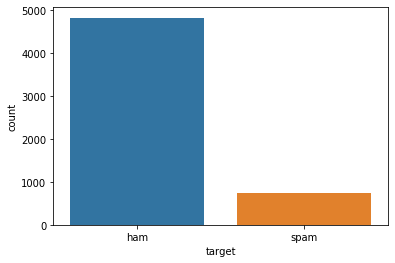

In [7]:
sns.countplot(sms_df['target'])

### Word Cloud for the spam message

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
spam_df = sms_df.loc[sms_df['target'] == 'spam',:]
spam_df.head()

,target,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [10]:
words = ' '.join(spam_df['message'])

print(words[:3000])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

In [11]:
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'www'
                            ])
cleaned_word

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message o

In [12]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

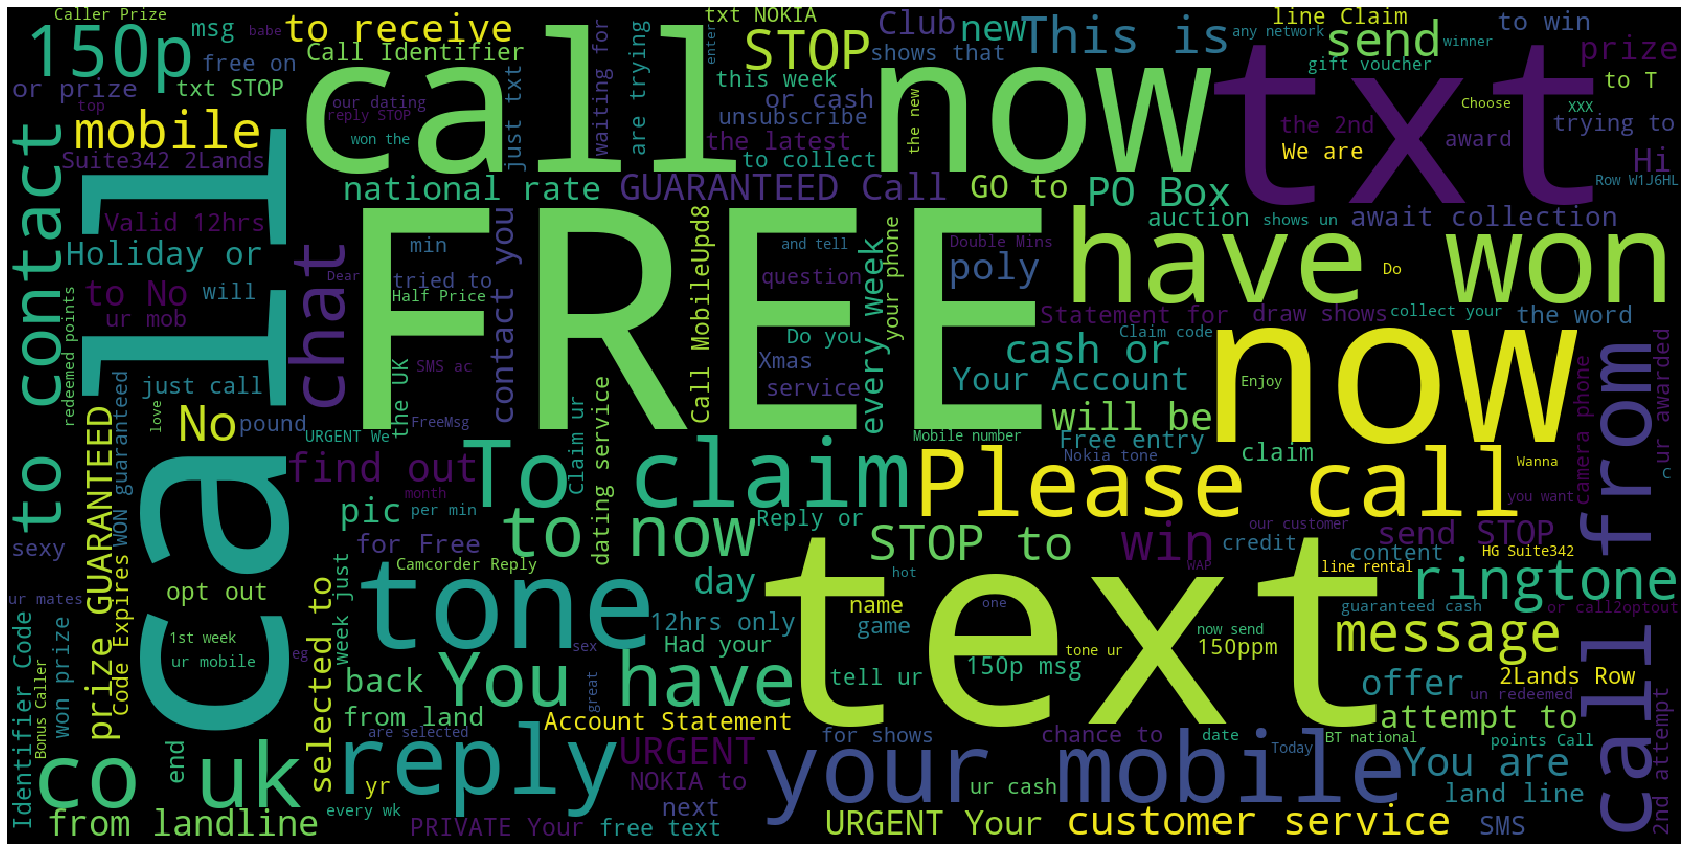

In [13]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 3. Data Preprocessing
#### Preprocessing steps:
* Removing special characters
* Convert sentence into lower case
* Remove Stop Words
* Stemming or Lemmatization

In [14]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [15]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [16]:
# We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [17]:
# initializing the lists

clean_sms_lst = []

sms_len_lst = []

In [18]:
def preprocess(raw_sms, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_sms)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_sms_lst.append(" ".join(words))
    
    sms_len_lst.append(len(words))

In [19]:
# install and import tqdm
! pip install tqdm

from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [20]:
clean_sms_lst = []

sms_len_lst = []

sms_df['message'].progress_apply(lambda x: preprocess(x, 'stem'))

sms_df['clean_sms_stem'] = clean_sms_lst

sms_df['sms_length_stem'] = sms_len_lst

100%|█████████████████████████████████████| 5572/5572 [00:40<00:00, 136.05it/s]


In [21]:
clean_sms_lst = []

sms_len_lst = []

sms_df['message'].progress_apply(lambda x: preprocess(x, 'lemma'))

sms_df['clean_sms_lema'] = clean_sms_lst

sms_df['sms_length_lema'] = sms_len_lst

100%|██████████████████████████████████████| 5572/5572 [01:12<00:00, 76.98it/s]


In [22]:
sms_df.head()

,target,message,clean_sms_stem,sms_length_stem,clean_sms_lema,sms_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


## 4. Data Preparation
Prepare the data and build the model.

In [23]:
# Preparing the target variable

sms_df['target']=sms_df['target'].apply(lambda x: 0 if x=='spam' else 1)

sms_df.head()

,target,message,clean_sms_stem,sms_length_stem,clean_sms_lema,sms_length_lema
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


In [24]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(sms_df,test_size=0.2,random_state=42)

In [25]:
train_clean_sms=[]
for sms in train['clean_sms_stem']:
    train_clean_sms.append(sms)

test_clean_sms=[]
for sms in test['clean_sms_stem']:
    test_clean_sms.append(sms)

#### Text to numerical vector using Bag of Words

BAG OF WORDS: https://machinelearningmastery.com/gentle-introduction-bag-words-model/

CODE EXAMPLE: https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/



In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_sms)

test_features = vectorizer.transform(test_clean_sms)

In [27]:
vectorizer.vocabulary_

{'repli': 3969,
 'win': 5387,
 'weekli': 5323,
 'fifa': 1661,
 'world': 5452,
 'cup': 1082,
 'held': 2114,
 'send': 4196,
 'stop': 4586,
 'end': 1461,
 'servic': 4213,
 'hello': 2118,
 'sort': 4461,
 'town': 4980,
 'alreadi': 147,
 'dont': 1314,
 'rush': 4069,
 'home': 2171,
 'eat': 1403,
 'nacho': 3145,
 'let': 2680,
 'know': 2577,
 'eta': 1512,
 'come': 931,
 'guoyang': 2032,
 'go': 1930,
 'tell': 4784,
 'told': 4934,
 'hey': 2130,
 'sathya': 4122,
 'till': 4897,
 'dint': 1255,
 'meet': 2934,
 'even': 1523,
 'singl': 4330,
 'time': 4898,
 'saw': 4131,
 'situat': 4342,
 'orang': 3389,
 'bring': 619,
 'rington': 4019,
 'chart': 793,
 'hero': 2127,
 'free': 1779,
 'hit': 2144,
 'week': 5321,
 'pic': 3571,
 'wap': 5279,
 'receiv': 3911,
 'tip': 4900,
 'sit': 4337,
 'mu': 3107,
 'wait': 5261,
 'everyon': 1531,
 'get': 1890,
 'suit': 4652,
 'take': 4736,
 'shower': 4290,
 'finish': 1680,
 'liao': 2684,
 'urgent': 5146,
 'mobil': 3034,
 'award': 353,
 'bonu': 563,
 'caller': 702,
 'prize': 

In [28]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 5593
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 5593)


## 5. Model Building and Evaluation

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn import metrics

In [30]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]

  0%|                                                    | 0/3 [00:00<?, ?it/s]

Accuracy of LogisticRegression is 0.9847533632286996


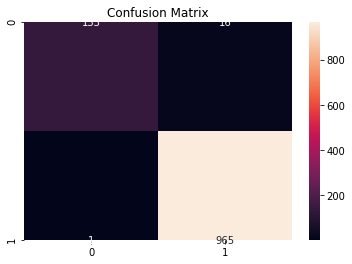

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       149
           1       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



 33%|██████████████▎                            | 1/3 [01:52<03:45, 112.90s/it]

Accuracy of DecisionTreeClassifier is 0.9748878923766816


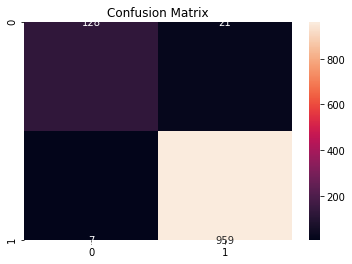

 67%|█████████████████████████████▎              | 2/3 [02:53<01:37, 97.15s/it]

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       149
           1       0.98      0.99      0.99       966

    accuracy                           0.97      1115
   macro avg       0.96      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy of SVC is 0.8663677130044843


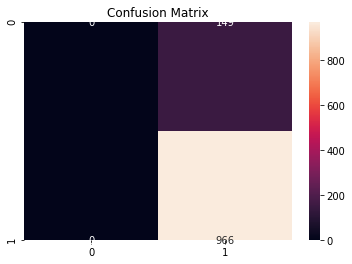

100%|███████████████████████████████████████████| 3/3 [07:28<00:00, 150.58s/it]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.87      1.00      0.93       966

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



100%|███████████████████████████████████████████| 3/3 [07:28<00:00, 149.58s/it]


In [31]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['target'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['target'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    sns.heatmap(metrics.confusion_matrix(test['target'],pred), annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    print(metrics.classification_report(test['target'],pred))

### Observation
By evaluating the model, We have find that the Logistic Regression is the best for this model.
so we can choose this algorithm as a spam detetion  